In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
import tensorflow as tf

In [9]:
mnist = tf.keras.datasets.mnist

In [20]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


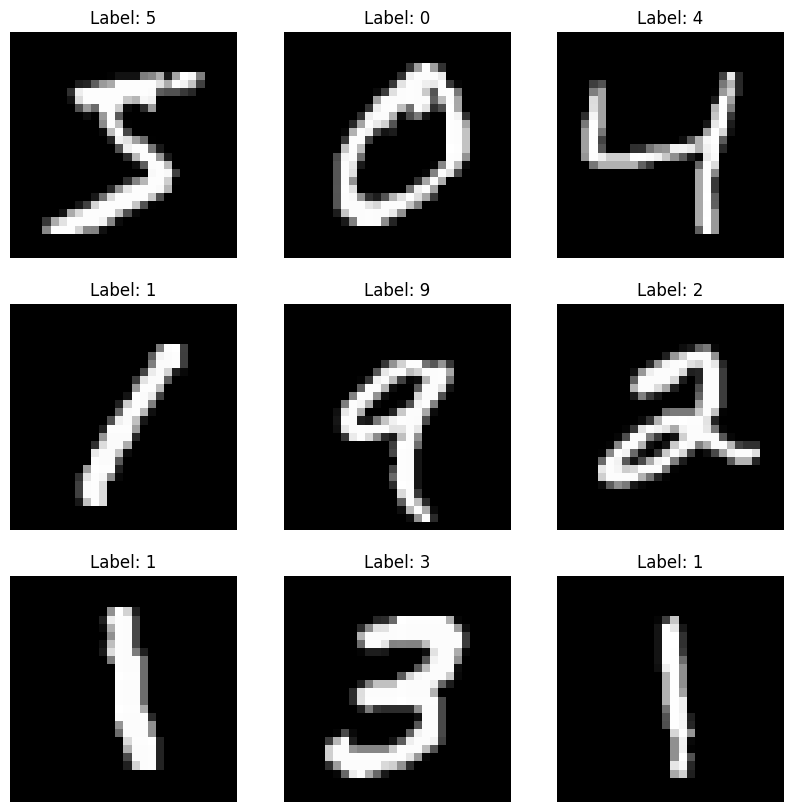

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title(f"Label: {train_y[i]}")
    plt.axis('off')
plt.show()

In [21]:
train_X = train_X.reshape(-1, 28*28).astype('float32') / 255
test_X = test_X.reshape(-1, 28*28).astype('float32') / 255

In [34]:
model=Sequential([
    Input(shape=(28*28,)),
    Dense(units=25,activation='relu',kernel_regularizer=l2(0.01)),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='softmax')
])

In [35]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [36]:
history = model.fit(train_X, train_y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7492 - loss: 1.0409 - val_accuracy: 0.9186 - val_loss: 0.4098
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9173 - loss: 0.3968 - val_accuracy: 0.9332 - val_loss: 0.3370
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9320 - loss: 0.3342 - val_accuracy: 0.9352 - val_loss: 0.3091
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9352 - loss: 0.3129 - val_accuracy: 0.9352 - val_loss: 0.3117
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9398 - loss: 0.2903 - val_accuracy: 0.9485 - val_loss: 0.2722
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9434 - loss: 0.2734 - val_accuracy: 0.9507 - val_loss: 0.2572
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9478 - loss: 0.2620 - val_accuracy: 0.9466 - val_loss: 0.2626
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9474 - loss: 0.2600 - 

In [37]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9370 - loss: 0.2779
Test accuracy: 0.9420999884605408


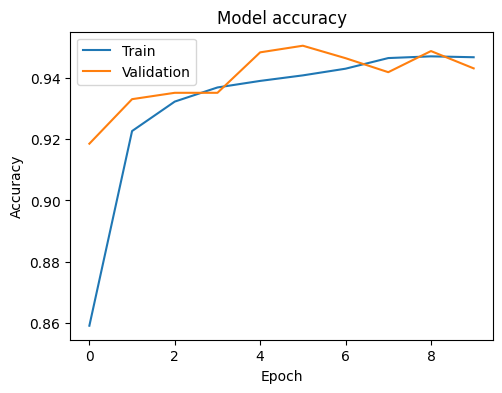

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

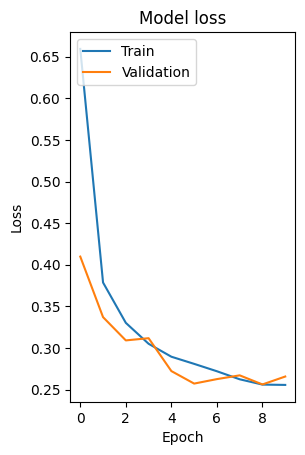

In [39]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Actual labels:     [7 8 0 0 3 3 7 6 8 3]
Predicted labels:  [7 8 0 0 3 5 7 6 8 3]
Accuracy for the sample: 90.00%


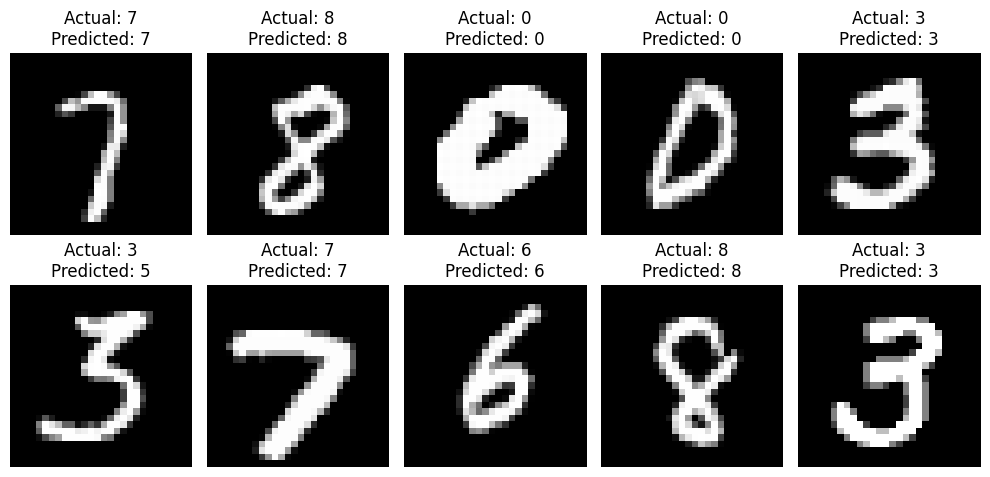

In [43]:
random_indices = np.random.choice(test_X.shape[0], size=10, replace=False)
sample_images = test_X[random_indices]
sample_labels = test_y[random_indices]

# Make predictions
predictions = model.predict(sample_images)

# Convert logits to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare actual and predicted results
print("Actual labels:    ", sample_labels)
print("Predicted labels: ", predicted_labels)

# Calculate accuracy for the sample
accuracy = np.mean(predicted_labels == sample_labels)
print(f'Accuracy for the sample: {accuracy * 100:.2f}%')

# Plot the sample images with actual and predicted labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {sample_labels[i]}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()